# Packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

import plotly.plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
#init_notebook_mode(connected=True)

# Presidential election results

In [2]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
code=["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

dfPres = pd.read_csv('presidentstates.csv')
dfPres = dfPres.sort_values(['state','year'], ascending=[True, True])
dfPres = dfPres.reset_index(drop=True)
dfPres = dfPres[['year','state','candidate','party','candidatevotes','totalvotes']].copy()

# drop blank candidates
dfPres = dfPres[pd.notnull(dfPres['candidate'])]

#ugh Minnesota
dfPres.loc[dfPres.party == 'democratic-farmer-labor', 'party'] = 'democrat'
#drop thirdparty candidates, sorry ralph
dfPres = dfPres.drop(dfPres[(dfPres.party != 'republican') & (dfPres.party != 'democrat')].index)

dfPres = dfPres.reset_index(drop=True)

# calculate vote percentage
dfPres['candidatevotes'] = dfPres['candidatevotes'].astype(np.int64)
dfPres['percentage'] = dfPres['candidatevotes'] / dfPres['totalvotes']
dfPres['percentage'] = dfPres['percentage'].round(3)

# assign percentage to party
dfPres.loc[dfPres.party == 'republican', 'repPres'] = dfPres['percentage']
dfPres.loc[dfPres.party == 'democrat', 'demPres'] = dfPres['percentage']
dfPres = dfPres[['year','state','repPres','demPres']].copy()
dfPres = dfPres.fillna(0)

#combine candidates of each race
dfPres = dfPres.groupby(['year', 'state'],as_index=False).agg({'repPres':'sum','demPres':'sum'})

#calcualate the margin of victory. dem win = pos, rep win = neg
dfPres.tail()
dfPres['demDifference'] = dfPres['demPres'] - dfPres['repPres']

dfPres.head()

,year,state,repPres,demPres,demDifference
0,1976,Alabama,0.426,0.557,0.131
1,1976,Alaska,0.579,0.357,-0.222
2,1976,Arizona,0.564,0.398,-0.166
3,1976,Arkansas,0.349,0.650,0.301
4,1976,California,0.497,0.480,-0.017


### Presidential elections by state

In [3]:
stateData = []
for state in states:
    dfStateSingle = dfPres.loc[dfPres.state == state]
    stateSingleList = dfStateSingle['demDifference'].tolist()
    stateSingleList = [state] + stateSingleList
    stateData.append(stateSingleList)
    
statesPresCol = []
for year in np.arange(1976,2020,4):
    statesPresCol.append(f'{year}')
    
statesPresCol = ['state'] + statesPresCol

dfStates = pd.DataFrame(stateData)
dfStates.columns = (statesPresCol)

dfStates.set_index('state')

dfStates.head()

,state,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Alabama,0.131,-0.014,-0.222,-0.193,-0.067,-0.069,-0.149,-0.257,-0.216,-0.221,-0.277
1,Alaska,-0.222,-0.279,-0.368,-0.233,-0.092,-0.175,-0.309,-0.256,-0.215,-0.140,-0.147
2,Arizona,-0.166,-0.324,-0.339,-0.213,-0.020,0.022,-0.063,-0.105,-0.085,-0.091,-0.036
3,Arkansas,0.301,-0.006,-0.222,-0.142,0.177,0.169,-0.054,-0.098,-0.198,-0.237,-0.269
4,California,-0.017,-0.168,-0.162,-0.035,0.134,0.129,0.117,0.099,0.240,0.231,0.301


### Locations of states

In [4]:
stateCenters = (32.7794, -86.8287),(48.386, -124.726),(34.2744, -111.6602),(34.8938, -92.4426),(37.1841, -119.4696),(38.9972, -105.5478),(41.6219, -72.7273),(38.9896, -75.5050),(28.6305, -82.4497),(32.6415, -83.4426),(38.92944444,-123.70972222),(44.3509, -114.6130),(40.0417, -89.1965),(39.8942, -86.2816),(42.0751, -93.4960),(38.4937, -98.3804),(37.5347, -85.3021),(31.0689, -91.9968),(45.3695, -69.2428),(39.0550, -76.7909),(42.2596, -71.8083),(44.3467, -85.4102),(46.2807, -94.3053),(32.7364, -89.6678),(38.3566, -92.4580),(47.0527, -109.6333),(41.5378, -99.7951),(39.3289, -116.6312),(43.6805, -71.5811),(40.1907, -74.6728),(34.4071, -106.1126),(42.9538, -75.5268),(35.5557, -79.3877),(47.4501, -100.4659),(40.2862, -82.7937),(35.5889, -97.4943),(43.9336, -120.5583),(40.8781, -77.7996),(41.6762, -71.5562),(33.9169, -80.8964),(44.4443, -100.2263),(35.8580, -86.3505),(31.4757, -99.3312),(39.3055, -111.6703),(44.0687, -72.6658),(37.5215, -78.8537),(47.3826, -120.4472),(38.6409, -80.6227),(44.6243, -89.9941),(42.9957, -107.5512)
centerUSA = (39.8000, -99.1086)
###
# alaska and hawaii are really far, would make location dominate, this shifts their closest points to the US to touching, and then shifts the center of the state over same amount
###
# hawaii flumevill ca 38.92944444,123.70972222, usually 20.2927, -156.3737
hawaiiCenter = (20.2927, 156.3737)
hawaiiClosestPoint = (19.9, 155.1)
closestToHawaii = (38.92944444,123.70972222)

# alaska: capeflattery, wa = (48.38638889, 124.72611111) center = (64.0685, -152.2782) closest=(54.8, -130.7)
alaskaCenter = (64.0685, 152.2782)
alaskaClosestPoint = (54.8, 130.7)
closestToAlaska = (48.386, 124.726)
alaskaOffset = np.subtract(alaskaClosestPoint,closestToAlaska)
alaskaAdjustedCenter = np.subtract(alaskaCenter,alaskaOffset)

def stateOffset(stateCenter,closestPoint,closestTo):
    Offset = np.subtract(closestPoint,closestTo)
    AdjustedCenter = np.subtract(stateCenter,Offset)
    return AdjustedCenter
print(stateOffset(alaskaCenter,alaskaClosestPoint, closestToAlaska))
print(stateOffset(hawaiiCenter,hawaiiClosestPoint, closestToHawaii))

distancesCenters = []
latitudes = []
longitudes = [] 

for center in stateCenters:
    #distancesCenters.append(geopy.distance.distance(center,centerUSA).km)
    latitudes.append(center[0])
    longitudes.append(center[1])

dfStates['Latitude'] = pd.Series(latitudes)
dfStates['Longitude'] = pd.Series(longitudes)
dfStates.head()

[ 57.6545 146.3042]
[ 39.32214444 124.98342222]


,state,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,Latitude,Longitude
0,Alabama,0.131,-0.014,-0.222,-0.193,-0.067,-0.069,-0.149,-0.257,-0.216,-0.221,-0.277,32.7794,-86.8287
1,Alaska,-0.222,-0.279,-0.368,-0.233,-0.092,-0.175,-0.309,-0.256,-0.215,-0.140,-0.147,48.3860,-124.7260
2,Arizona,-0.166,-0.324,-0.339,-0.213,-0.020,0.022,-0.063,-0.105,-0.085,-0.091,-0.036,34.2744,-111.6602
3,Arkansas,0.301,-0.006,-0.222,-0.142,0.177,0.169,-0.054,-0.098,-0.198,-0.237,-0.269,34.8938,-92.4426
4,California,-0.017,-0.168,-0.162,-0.035,0.134,0.129,0.117,0.099,0.240,0.231,0.301,37.1841,-119.4696


### Racial demographics of states

In [5]:
dfStatesRace = pd.read_csv('racedata.csv')
dfStatesRace = dfStatesRace.drop('Location', 1)
dfStatesRace = dfStatesRace.drop('Asian', 1)
dfStates = pd.concat([dfStates, dfStatesRace], axis=1, sort=False)

dfStates.head()

,state,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,Latitude,Longitude,White,Black,Hispanic
0,Alabama,0.131,-0.014,-0.222,-0.193,-0.067,-0.069,-0.149,-0.257,-0.216,-0.221,-0.277,32.7794,-86.8287,0.66,0.27,0.04
1,Alaska,-0.222,-0.279,-0.368,-0.233,-0.092,-0.175,-0.309,-0.256,-0.215,-0.140,-0.147,48.3860,-124.7260,0.61,0.03,0.07
2,Arizona,-0.166,-0.324,-0.339,-0.213,-0.020,0.022,-0.063,-0.105,-0.085,-0.091,-0.036,34.2744,-111.6602,0.55,0.04,0.31
3,Arkansas,0.301,-0.006,-0.222,-0.142,0.177,0.169,-0.054,-0.098,-0.198,-0.237,-0.269,34.8938,-92.4426,0.73,0.15,0.08
4,California,-0.017,-0.168,-0.162,-0.035,0.134,0.129,0.117,0.099,0.240,0.231,0.301,37.1841,-119.4696,0.37,0.05,0.39


### Self-Identity

In [6]:
dfMidwest = pd.read_csv('midwest.csv')
dfMidwest.head()

,RespondentID,Open-Ended Response,A lot,Some,Not much,Not at all,Illinois,Indiana,Iowa,Kansas,...,Graduate degree,New England,Middle Atlantic,East North Central,West North Central,South Atlantic,East South Central,West South Central,Mountain,Pacific
0,3126807211,Southern,NaN,NaN,Not much,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West South Central,NaN,NaN
1,3126802202,Midwest,A lot,NaN,NaN,NaN,Illinois,Indiana,Iowa,Kansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3126791039,Midwest,NaN,NaN,Not much,NaN,Illinois,NaN,Iowa,NaN,...,NaN,NaN,NaN,East North Central,NaN,NaN,NaN,NaN,NaN,NaN
3,3126780936,Mid-west,A lot,NaN,NaN,NaN,Illinois,Indiana,NaN,NaN,...,NaN,NaN,NaN,East North Central,NaN,NaN,NaN,NaN,NaN,NaN
4,3126779836,Midwest,A lot,NaN,NaN,NaN,NaN,NaN,Iowa,Kansas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
responses = dfMidwest.count().tolist()
totalResponses = max(responses)
dfMidwest.count()
#1953, 523
responses[6:26]
dfMid = pd.DataFrame()
dfMid['state'] = ['Illinois','Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin','Arkansas','Colorado','Kentucky','Oklahoma','Pennsylvania','West Virginia','Montana','Wyoming']
dfMid['Midwest Percentage'] = np.divide(responses[6:26],totalResponses) ### numpy?? dividy by list
dfMid

#dfStates.join(dfMid, on='state')

,state,Midwest Percentage
0,Illinois,0.703024
1,Indiana,0.657307
2,Iowa,0.714903
3,Kansas,0.583873
4,Michigan,0.513679
5,Minnesota,0.539957
6,Missouri,0.547876
7,Nebraska,0.569474
8,North Dakota,0.371130
9,Ohio,0.537797


# K Means

In [8]:
def scalingFeatures(df):
    df = df.drop('state', 1)
    scaler = MinMaxScaler()
    dfTransformed = scaler.fit_transform(df)
    df = pd.DataFrame(dfTransformed, columns = df.columns)
    
    return df

In [9]:
def weightingFeatures(df, results, location, demographics):

    n = len(range(1992,2020,4))
    for year in range(1992,2020,4):
        df[f'{year}'] = df[f'{year}']*(results/(n+1))
        n -= 1

    for year in range(1976,1991,4):
        df[f'{year}'] = df[f'{year}']*(results/(15))
        
    df['Latitude'] = df['Latitude']*(location/2)
    df['Longitude'] = df['Longitude']*(location/2)

    df['White'] = df['White']*(demographics/3)
    df['Black'] = df['Black']*(demographics/3)
    df['Hispanic'] = df['Hispanic']*(demographics/3)
    
    return df

In [10]:
def weightingFeaturesNew(df, location):
    
    df['Latitude'] = df['Latitude']*(location)
    df['Longitude'] = df['Longitude']*(location)    
    return df

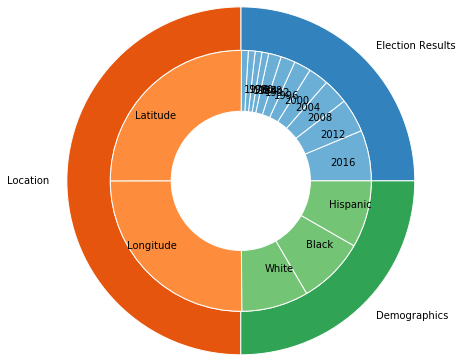

In [11]:
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.5

cm = plt.get_cmap("tab20c")
cout = cm(np.arange(3)*4)
pie, _ = ax.pie([2,4,2], radius=2, labels=['Election Results', 'Location', 'Demographics'], colors=cout)
plt.setp( pie, width=width, edgecolor='white')

cin = cm(np.array([1,1,1,1,1,1,1,1,1,1,1,5,5,9,9,9]))
labels = ['2016','2012','2008','2004','2000','1996','1992','1988','1984','1980','1976','Latitude','Longitude','White','Black','Hispanic']
pie2, _ = ax.pie([1/2,1/3,1/4,(1/5),(1/6),(1/7),(1/8),1/15,1/15,1/15,1/15,2,2,.66,.66,.66], radius=2-width, labels=labels,
                                      labeldistance=.7, colors=cin)
plt.setp(pie2, width=width+.2, edgecolor='white')
plt.show()

In [12]:
print(list(map("".join, zip(list("aabbcc"),map(str, [1,2]*3)))))

['a1', 'a2', 'b1', 'b2', 'c1', 'c2']


In [13]:
def clusteringKmeans(df,k):
    model = KMeans(n_clusters=k, init='k-means++', n_init=20)
    model.fit(df)
    labels = model.predict(df)

    dfClusters = pd.DataFrame(list(zip(code,states,labels)))
    dfClusters.columns = ('code','state','cluster')
    df = pd.concat([dfClusters, dfStates], axis=1, sort=False)
    #df = df.sort_values('cluster')
    df['clusterscaled'] = df['cluster']/k
    
    return df

In [14]:
dfScaled = scalingFeatures(dfStates)

In [15]:
dfWeighted = weightingFeatures(dfScaled, 1,3,1)

In [16]:
dfClustered = clusteringKmeans(dfWeighted,8)

# Mapping

In [40]:
def creatingMap(df, n):
    for col in df.columns:
        df[col] = df[col].astype(str)

    scl = [
        [(0/n), 'rgb(141,211,199)'],
        [(1/n), 'rgb(255,255,179)'],
        [(2/n), 'rgb(190,186,218)'],
        [(3/n), 'rgb(251,128,114)'],
        [(4/n), 'rgb(128,177,211)'],
        [(5/n), 'rgb(253,180,98)'],
        [(6/n), 'rgb(179,222,105)'],
        [(7/n), 'rgb(252,205,229)'],
        [(8/n), 'rgb(217,217,217)']
       # [(9/n), 'rgb(200,30,120)'],
        #[(10/n), 'rgb(40,150,200)'],
    ]
    df = df.round()
    df['text'] = '2016 ' + df['2016']

    data = [go.Choropleth(
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['cluster'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = go.choropleth.Marker(
            line = go.choropleth.marker.Line(
                color = 'rgb(255,255,255)',
                width = 2
            )),
        #colorbar = go.choropleth.ColorBar(
           # title = "Millions USD")
    )]

    layout = go.Layout(
        title = go.layout.Title(
            text = 'Political Geographical Clusters'
        ),
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
    )

    fig = go.FigureWidget(data = data, layout = layout)
    iplot(fig)

In [39]:
creatingMap(dfClustered,8)

# Inertia

In [19]:
def calculatingInertia(df):
    
    num_clusters = list(range(3, 25))
    inertias = []

    for k in num_clusters:
        model = KMeans(n_clusters=k, init='k-means++', n_init=10)
        model.fit(df)
        inertias.append(model.inertia_)

    plt.figure()
    plt.plot(num_clusters, inertias, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

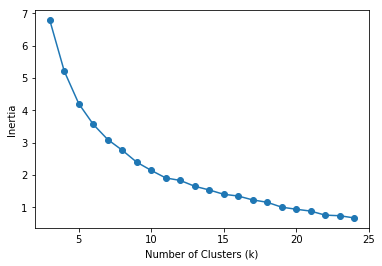

In [20]:
calculatingInertia(dfWeighted)

### mean of population?? would probably only be relevant for alaska, maybe west coast
### try another sorting algorithm

### add fivethirtyeight polls on midwest and south
### switch to bokeh?? for map
### after finalizing, name clusters